In [1]:
# Bibliotecas
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Raspagem inicial
url = 'https://www.imdb.com/title/tt3581920/episodes?ref_=tt_eps_sm'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')

episode_containers = html_soup.find_all('div', class_ = 'list_item')
len(episode_containers)

9

In [3]:
# Criação da lista
def get_value(soup):
  if soup is None:
    return ''
  else:
    return soup.getText().strip()

episodes = []
episode_number = 1

for ep_container in episode_containers:
  title = get_value(ep_container.find('a', itemprop='name'))
  release_date = get_value(ep_container.find('div', class_='airdate'))
  rating = get_value(ep_container.find('span', class_='ipl-rating-star__rating'))
  votings = get_value(ep_container.find('span', class_='ipl-rating-star__total-votes'))
  votings = re.sub("[^0-9]", "", votings)
  description = get_value(ep_container.find('div', class_='item_description'))
  episode = 'S1E0' + str(episode_number)
  ep_data = [episode, title, release_date, rating, votings, description]
  episodes.append(ep_data)
  episode_number+=1

In [4]:
# DF inicial
df_tv = pd.DataFrame(episodes, columns=['episode', 'title', 'release_date', 'rating', 'votings', 'description'])
df_tv['release_date'] = pd.to_datetime(df_tv['release_date'])
df_tv['rating'] = df_tv['rating'].replace('', '0').astype('float')
df_tv['votings'] = df_tv['votings'].replace('', '0').astype('int')

# Utilizando apenas episódios lançados até então
import datetime
df_tv = df_tv[df_tv['release_date'] < datetime.datetime.now()]
df_tv

,episode,title,release_date,rating,votings,description
0,S1E01,When You're Lost in the Darkness,2023-01-16,9.2,96008,Twenty years after a fungal outbreak ravages t...
1,S1E02,Infected,2023-01-22,9.1,88681,"After escaping the QZ, Joel and Tess clash ove..."
2,S1E03,"Long, Long Time",2023-01-29,8.0,201625,"When a unknown person approaches his compound,..."
3,S1E04,Please Hold to My Hand,2023-02-05,8.4,54166,"After abandoning their truck in Kansas City, J..."
4,S1E05,Endure and Survive,2023-02-10,9.5,59927,"While attempting to evade the rebels, Joel and..."
5,S1E06,Kin,2023-02-19,9.0,38088,"After ignoring the advice of locals, Joel and ..."
6,S1E07,Left Behind,2023-02-26,7.5,34596,"As Joel fights to survive, Ellie looks back on..."


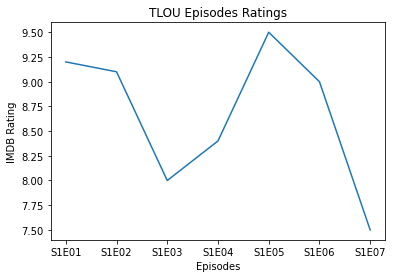

In [5]:
# Episodes x Ratings
plt.plot(df_tv.episode, df_tv.rating)
plt.title('TLOU Episodes Ratings')
plt.xlabel('Episodes')
plt.ylabel('IMDB Rating')
plt.savefig('episodes_ratings.png')
plt.show()

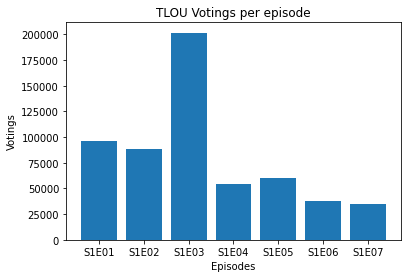

In [6]:
# Episodes x Votings
plt.bar(df_tv.episode, df_tv.votings)
plt.title('TLOU Votings per episode')
plt.xlabel('Episodes')
plt.ylabel('Votings')
plt.savefig('episodes_votings.png')
plt.show()

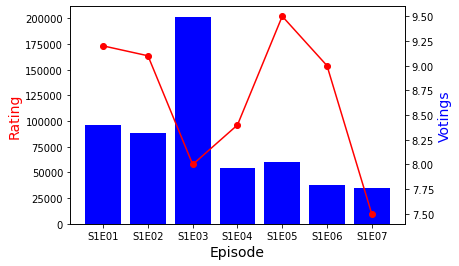

In [7]:
# Episodes x Rating x Votings
fig,ax = plt.subplots()
ax.bar(df_tv.episode, df_tv.votings,color="blue")
ax.set_xlabel("Episode", fontsize = 14)
ax.set_ylabel("Rating",
              color="red",
              fontsize=14)

ax2 = ax.twinx()
ax2.plot(df_tv.episode,
        df_tv.rating,
        color="red", 
        marker="o")
ax2.set_ylabel("Votings",color="blue",fontsize=14)
plt.savefig('episodes_ratings_votings.png')
plt.show()


# TV and Games Comparison

In [8]:
# Dataframe with games and TV
pd_tlou = pd.read_csv('tlou_games.csv')
pd_tlou.rename(columns={'Title': 'title', 'Release_Date': 'release_date', 'Console': 'platform', 'Rating': 'rating'}, inplace=True)
pd_tlou['release_date'] = pd.to_datetime(pd_tlou['release_date'])
tv = {'title': 'The Last of Us - HBO', 'platform': 'TV', 'rating': round(df_tv['rating'].mean(), 2), 'release_date': pd.to_datetime(df_tv.iloc[0]['release_date'])}
pd_tlou = pd_tlou.append(tv, ignore_index=True)
pd_tlou

,title,release_date,platform,rating
0,The Last of Us Part I,2013-06-14,PlayStation 3,9.30
1,The Last of Us Part I - Left Behind,2014-02-14,PlayStation 3/4,9.00
2,The Last of Us Part I - Remastered,2014-07-30,PlayStation 4,9.50
3,The Last of Us Part II,2020-06-19,PlayStation 4,9.50
4,The Last of Us Part I - PS5,2021-06-02,PlayStation 5,9.70
5,The Last of Us - HBO,2023-01-16,TV,8.67


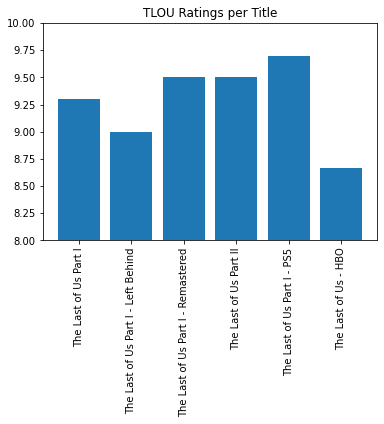

In [9]:
# Episodes x Votings
plt.bar(pd_tlou.title, pd_tlou.rating)
plt.title('TLOU Ratings per Title')
plt.xticks(pd_tlou.title, pd_tlou.title, rotation='vertical')
plt.ylim(8, 10)
plt.savefig('titles_ratings.png')
plt.show()